In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline
random.seed(123)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('categ_multi.csv')

In [4]:
df.head()

,income,age,sex,overtime
0,53,39,F,Y
1,67,44,M,N
2,55,32,M,Y
3,76,42,M,Y
4,98,23,F,N


In [5]:
print ("Total number of rows in the dataset are - {}".format(df.shape[0]))
print ("Total number of columns in the dataset are - {}".format(df.shape[1]))

Total number of rows in the dataset are - 8
Total number of columns in the dataset are - 4


In [6]:
target_col = 'income'
target = df[target_col]
df.drop('income', axis = 1, inplace = True)
catVars = ['sex', 'overtime']
df_cat = df.drop(['sex', 'overtime'], axis = 1).copy()

In [7]:
def plot_correlation(df, target):
    k = 10
    numerical_feature_columns = list(df._get_numeric_data().columns)
    cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    return sns.heatmap(cm, annot=True, cmap = 'viridis')

In [8]:
def encode_cat_var_fit_model(
    df, df_cat, catVars, target, clf, drop_one_col, plot_corr, target_col
):
    if drop_one_col == 1:
        dummy_var = pd.get_dummies(df[catVars], drop_first=True)
    else:
        dummy_var = pd.get_dummies(df[catVars], drop_first=False)
    reg_df = pd.concat([df_cat, dummy_var], axis=1)
    temp_reg_df = pd.concat([df_cat, dummy_var, target], axis=1)
    if plot_corr == 1:
        plot_out = plot_correlation(temp_reg_df, target_col)
    model_fit = clf.fit(reg_df, target)
    coeffs = pd.Series(model_fit.coef_)
    coef_dict = dict(zip(reg_df.columns, coeffs))
    return coef_dict

In [9]:
linear_reg = LinearRegression()

Coefficients for Linear Regression without dropping columns : 

age : -0.017 

sex_F : -1.58 

sex_M : 1.58 

overtime_N : 5.461 

overtime_Y : -5.461 



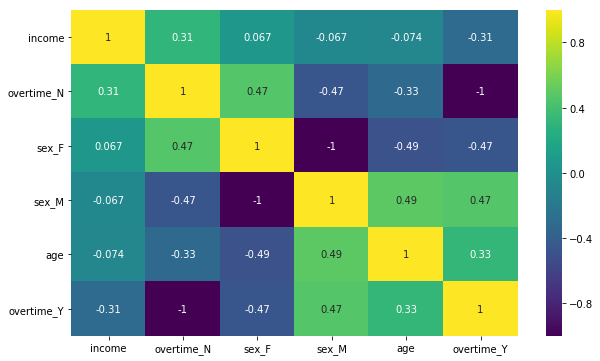

In [10]:
coeff_not_dropping_one_col = encode_cat_var_fit_model(
    df,
    df_cat,
    catVars,
    target,
    linear_reg,
    drop_one_col=0,
    plot_corr=1,
    target_col=target_col,
)
print('Coefficients for Linear Regression without dropping columns : \n')
for key, value in coeff_not_dropping_one_col.items():
    print (key, ':', round(value, 3), '\n')

Coefficients for Linear Regression without dropping columns : 

age : -0.017 

sex_M : 3.161 

overtime_Y : -10.922 



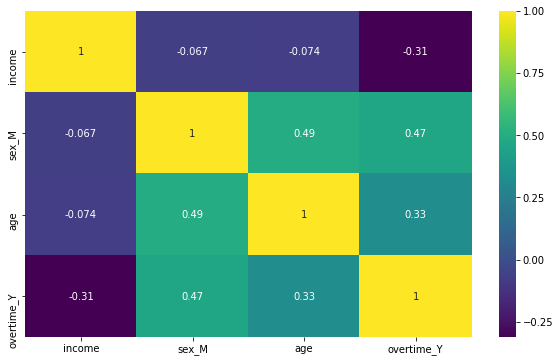

In [11]:
coeff_dropping_one_col = encode_cat_var_fit_model(
    df,
    df_cat,
    catVars,
    target,
    linear_reg,
    drop_one_col=1,
    plot_corr=1,
    target_col=target_col,
)

print('Coefficients for Linear Regression without dropping columns : \n')
for key, value in coeff_dropping_one_col.items():
    print (key, ':', round(value, 3), '\n')

In [12]:
lasso_reg = Lasso(alpha=0.1)

Coefficients for Linear Regression without dropping columns : 

age : -0.003 

sex_F : -2.266 

sex_M : 0.0 

overtime_N : 10.149 

overtime_Y : -0.0 



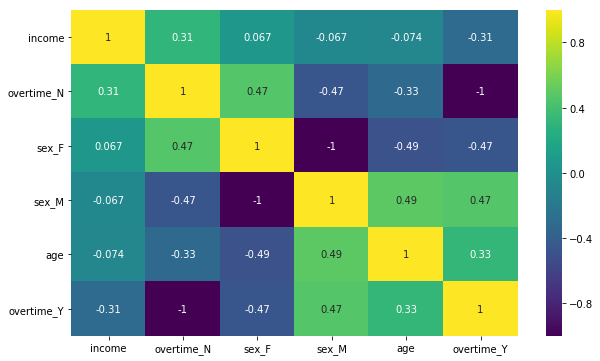

In [13]:
lasso_coeff_not_dropping_one_col = encode_cat_var_fit_model(
    df,
    df_cat,
    catVars,
    target,
    lasso_reg,
    drop_one_col=0,
    plot_corr=1,
    target_col=target_col,
)
print('Coefficients for Linear Regression without dropping columns : \n')
for key, value in lasso_coeff_not_dropping_one_col.items():
    print (key, ':', round(value, 3), '\n')